<a href="https://colab.research.google.com/github/Pickase/Bike-Rental/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Csv/day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df.shape

(731, 16)

### **Observation**:
The datatset contains per day bike rentall counts with 721 entires and 16 attibutes, out of which 12 variables and 1 depedent variable forms parts of regression analysis.

In [6]:
#Checking the data tyoes available in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#Displaying the basic statistics of the numerical values
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Converting normalized tempratire to regular temprature
ntemp=(df['temp']*47)-8
#Converting normalized feel temprature to regular feel temprature
nftemp=(df['atemp']*47)-8

In [9]:
#Adding regular temprature to dataframe
df['ntemp']=ntemp
df['nftemp']=nftemp

In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ntemp,nftemp
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,8.175849,9.090375
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,9.083466,8.625733
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.229108,0.902035
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.400000,1.969734
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,2.666979,2.775690


**De-normalising Hunididty and Windspeed values**
- hum:Normalized humidity. The vaues are divided to 100(max)
- windspeed:  Normalized wind speed. The values are divided to 67(max)

In [11]:
nhum=df['hum']*100
hwind=df['windspeed']*67

In [12]:
df['nhum']=nhum
df['nwind']=hwind

## Feature Engineering
Checking for Correlation using Heatmap.

# Data Preprocessing

Checking for missing values.

In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
ntemp         0
nftemp        0
nhum          0
nwind         0
dtype: int64

In [14]:
df.drop(columns=['temp','atemp','hum','windspeed','casual','registered','instant','dteday'],inplace=True)

### Outlier Treatment

In [15]:
#Handling Outliers using 5th and 95th percentile.
for column in df[['nhum','nwind']]:
  df[column]=np.where(df[column]<df[column].quantile(0.05),df[column].quantile(0.05),df[column])
  df[column]=np.where(df[column]>df[column].quantile(0.95),df[column].quantile(0.95),df[column])

<Axes: >

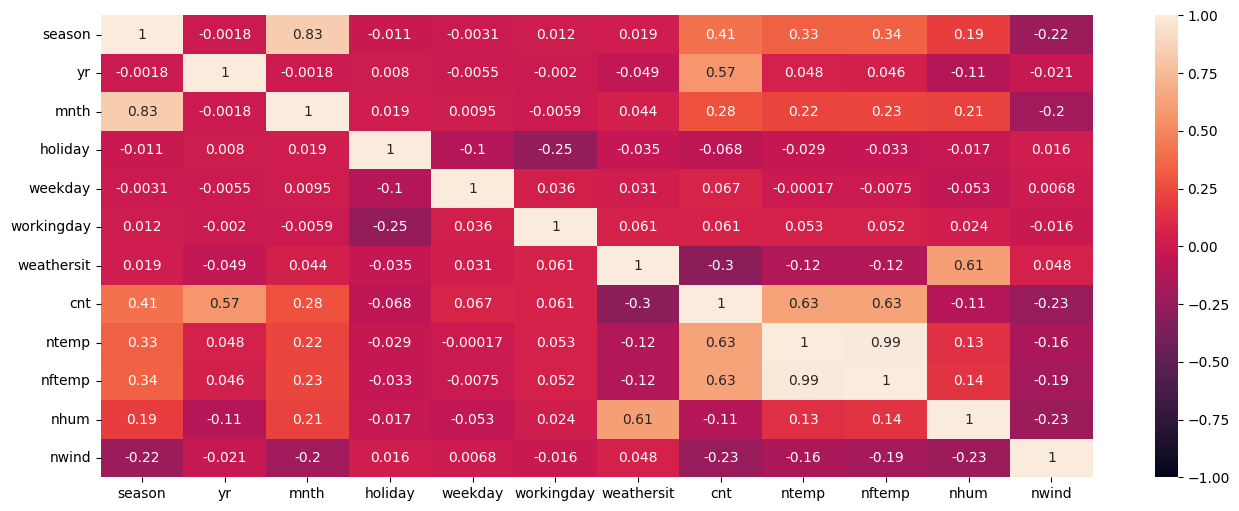

In [16]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

## Scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std=StandardScaler()
scaled=std.fit_transform(df)
scaled

array([[-1.34821315, -1.00136893, -1.60016072, ..., -0.67994602,
         1.34192097, -0.40729299],
       [-1.34821315, -1.00136893, -1.60016072, ..., -0.74065231,
         0.50882269,  0.82289734],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.749767  ,
        -1.45587303,  0.81968546],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.42434419,
         0.94022771, -0.91090115],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.49004895,
        -1.10622469,  2.14596673],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.54048197,
        -0.39138893, -0.48549518]])

In [19]:
scaled_df=pd.DataFrame(data=scaled,columns=df.columns)
scaled_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,ntemp,nftemp,nhum,nwind
0,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-1.817953,-0.826662,-0.679946,1.341921,-0.407293
1,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-1.912999,-0.721095,-0.740652,0.508823,0.822897
2,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.629925,-1.634657,-1.749767,-1.455873,0.819685
3,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.519898,-1.614780,-1.610270,-0.293197,-0.409388
4,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.500269,-1.467414,-1.504971,-1.458272,-0.037871


Splitting the data into training and test sets

In [20]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [21]:
X=scaled_df.drop('cnt',axis=1)
y=scaled_df['cnt']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)

## Model Building

### Support Vector Regressor

- An SVM classifier, or support vector machine classifier, is a type of machine learning algorithm that can be used to analyze and classify data. A support vector machine is a supervised machine learning algorithm that can be used for both classification and regression tasks. The Support vector machine classifier works by finding the hyperplane that maximizes the margin between the two classes. The Support vector machine algorithm is also known as a max-margin classifier. Support vector machine is a powerful tool for machine learning and has been widely used in many tasks such as hand-written digit recognition, facial expression recognition, and text classification. Support vector machine has many advantages over other machine learning algorithms, such as robustness to noise and the ability to handle large datasets. 

- SVM can be used to solve non-linear problems by using kernel functions. For example, the popular RBF (radial basis function) kernel can be used to map data points into a higher dimensional space so that they become linearly separable. Once the data points are mapped, SVM will find the optimal hyperplane in this new space that can separate the data points into two classes

In [25]:
from sklearn.svm import SVR#importing SVR classifier
svr=SVR()
svr.fit(X_train,y_train)#fitting train values for further classification
svrypred=svr.predict(X_test)#prediction of model for test dataset
svrtrscore=r2_score(y_test,svrypred)#calculating r2 score for test dataset
svrypredtr=svr.predict(X_train)#prediction of model for train dataset
svrtescore=r2_score(y_train,svrypredtr)#calculating r2 score for train dataset
print('Train Score is : ',svrtrscore,' and Test Score is : ',svrtescore)#printing test and train r2 score value 

Train Score is :  0.9127907455259558  and Test Score is :  0.9379026820985511
